# Clustering with Kmeans

## load the data

In [22]:
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=5000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=50)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S17",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
143,100001,4/24/15,G,O,Y,1,0.0,0.0,0.000000,0.000000,8.8924,0.9,170.4,1,0.000000,1023
1452,100003,11/22/16,C,L,T,1,0.0,0.0,0.000000,0.000000,8.7048,0.0,4.4,1,0.000000,1121
1974,100009,4/27/16,H,M,X,3,0.0,0.0,23.614483,7202.413793,3.2824,42.7,57.1,1,89.084138,832
2882,100014,10/21/16,H,M,S,2,0.0,0.0,24.680690,5257.103448,3.7310,25.5,43.1,1,45.019310,1449
2940,100017,12/18/14,E,K,T,2,0.0,0.0,29.906154,5233.307692,8.4132,0.1,678.0,1,1.092308,9996


plot the scatter plot

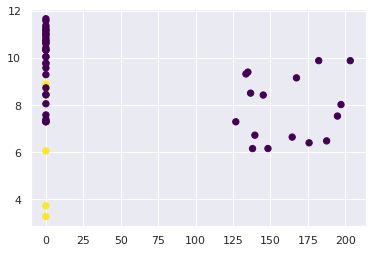

In [18]:
plt.scatter(sensor_failure_all['S17'], sensor_failure_all['S16'], c=sensor_failure_all['EQUIPMENT_FAILURE'], s=40, cmap='viridis')

In [17]:
sensor_failure_all['EQUIPMENT_FAILURE'].shape

(58,)

In [3]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## plot the centroids and the groups of the clustering output

In [58]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None): #, ax=None
    labels = kmeans.fit_predict(X)
    plt.title('k means with rounded groups')
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

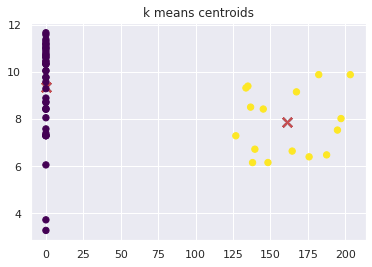

In [56]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(Xs).predict(Xs)


#plt.plot()
plt.title('k means centroids with groups')


centers = np.array(kmeans.cluster_centers_)

for i, l in enumerate(kmeans.labels_):
  #  plt.plot(Xs.iloc[:, 0][i], Xs.iloc[:, 1][i], color=colors[l], marker=markers[l],ls='None')
    #plt.xlim([0, 10])
    #plt.ylim([0, 10])

  plt.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=80)




#plot
plt.scatter(Xs.iloc[:, 0], Xs.iloc[:, 1], c=labels, s=40, cmap='viridis')

plt.show()

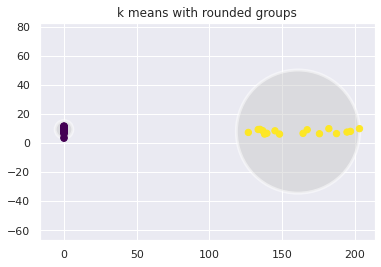

In [59]:
plot_kmeans(kmeans, Xs.values)